In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
ALGO = ['correction', 'detection_correction']
COMMODITY = ['cobalt_shift_new_20', 'copper_shift_new_20', 'magnesium_shift_new_20', 'nickel_shift_new_20']

In [31]:
plt.rcParams.update({
    'axes.titlesize': 18,  
    'axes.labelsize': 16,  
    'xtick.labelsize': 14, 
    'ytick.labelsize': 14,  
    'legend.fontsize': 14  
})

fontsize = 12

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_ablation_barcharts(xlsx_path, algorithm, comm):
    # Read the xlsx file into a pandas DataFrame
    comm = comm.split('_')[0]
    comm = comm.capitalize()    
    df = pd.read_excel(xlsx_path)
    
    # Fill empty 'Exclude' fields with 'None'
    df['Exclude'].fillna('None', inplace=True)

    # Filter out rows where 'Exclude' is 'RNN'
    df = df[df['Exclude'] != 'RNN']

    df = df[df['Exclude'] != 'LSTM']

    df = df[df['Algorithm'] == 'detection_correction']
    
    # Filter based on the algorithm
    df = df[df['Algorithm'] == algorithm]

    # Identify unique models
    models = df['Model'].unique()
    
    for model in models:
        
        model_df = df[df['Model'] == model]

        # Prepare the data for plotting
        excluded_models = sorted([x for x in model_df['Exclude'].unique() if x != 'None'], key=lambda x: (x != 'None'))
        prec_edcr = model_df.groupby('Exclude')['Precision (EDCR)'].mean().reindex(excluded_models + ['None'])
        rec_edcr = model_df.groupby('Exclude')['Recall (EDCR)'].mean().reindex(excluded_models + ['None'])

        barWidth = 0.35
        r1 = np.arange(len(prec_edcr) - 1)  # Adjust for 'None'
        r2 = [x + barWidth for x in r1]

        plt.figure(figsize=(6,5))
        bars1 = plt.bar(r1, prec_edcr[excluded_models], color='k', width=barWidth, edgecolor='grey', label='Precision (EDCR)', zorder=1)
        bars2 = plt.bar(r2, rec_edcr[excluded_models], color='white', width=barWidth, edgecolor='black', label='Recall (EDCR)', zorder=2)

        # Calculate the maximum value from both precision and recall excluding 'None'
        max_value = max(prec_edcr[excluded_models].max(), rec_edcr[excluded_models].max())
        y_max = max_value + 0.05  # Adding a small margin above the highest bar for better visualization

        # Horizontal lines for 'None'
        none_precision = prec_edcr['None']
        none_recall = rec_edcr['None']
        plt.axhline(y=none_precision, color='red', linestyle=(5, (10, 3)), linewidth=2)
        plt.axhline(y=none_recall, color='blue', linestyle='dotted', linewidth=2)

        # Create custom legend handles
        precision_handle = mlines.Line2D([], [], color='red', linestyle=(5, (10, 3)), linewidth=2, label='Precision (EDCR) - No Ablation')
        recall_handle = mlines.Line2D([], [], color='blue', linestyle='dotted', linewidth=2, label='Recall (EDCR) - No Ablation')

        # Annotations for the difference
        for bar, value in zip(bars1, prec_edcr[excluded_models]):
            diff = value - none_precision
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, value/2, f'{sign}{abs(diff):.2f}', ha='center', va='center', color='white', fontsize=fontsize)

        for bar, value in zip(bars2, rec_edcr[excluded_models]):
            diff = value - none_recall
            sign = '+' if diff > 0 else '-' if diff < 0 else ''
            plt.text(bar.get_x() + bar.get_width()/2, value/2, f'{sign}{abs(diff):.2f}', ha='center', va='center', color='black', fontsize=fontsize)

        plt.xlabel('Excluded Model', fontweight='bold')
        labels = [label.replace('CNNA', 'CNN Attention') for label in excluded_models]
        plt.xticks([r + barWidth/2 for r in range(len(prec_edcr) - 1)], labels)
        plt.ylabel('Performance (Magnesium)', fontweight='bold')
        plt.ylim([0, y_max])  # Dynamic y-axis limit based on the data
        plt.grid(True, linestyle='-', which='both', color='grey', alpha=0.3, axis='y', zorder=-1)

        # First legend for bars
        handles = [bars1, bars2, precision_handle, recall_handle]  # Include bars for F1 score as well if needed
        labels = ['Precision (EDCR)', 'Recall (EDCR)', 'Precision (EDCR) - No Ablation', 'Recall (EDCR) - No Ablation']  # Update labels as needed

        # Create a single legend for all items
        plt.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2)
        # plt.title(f'{comm}: EDCR Performance for {model} using {algorithm}')

        plt.xticks(rotation=0)
        plt.tight_layout()  
        plt.show()
        plt.close()


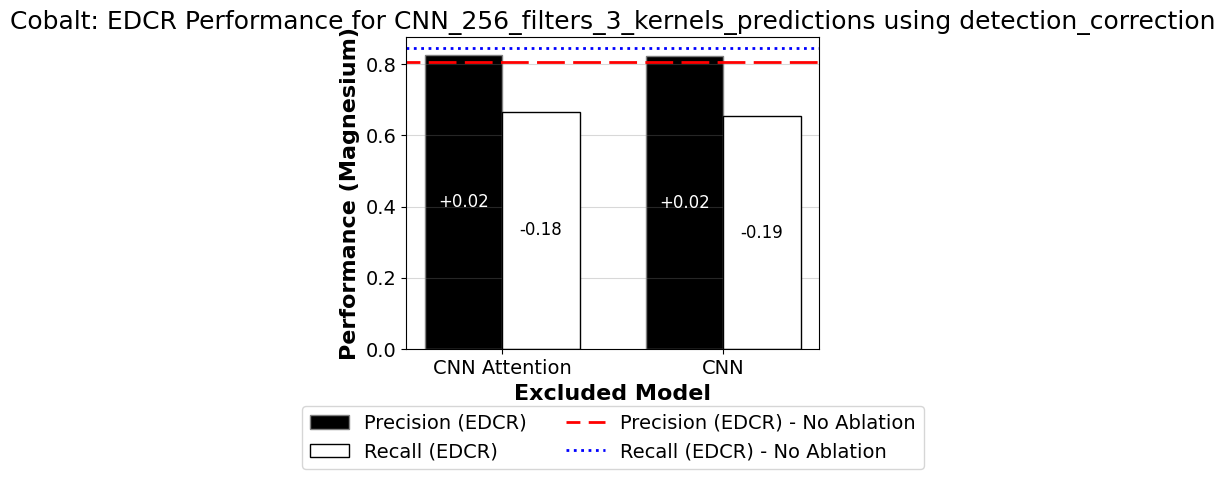

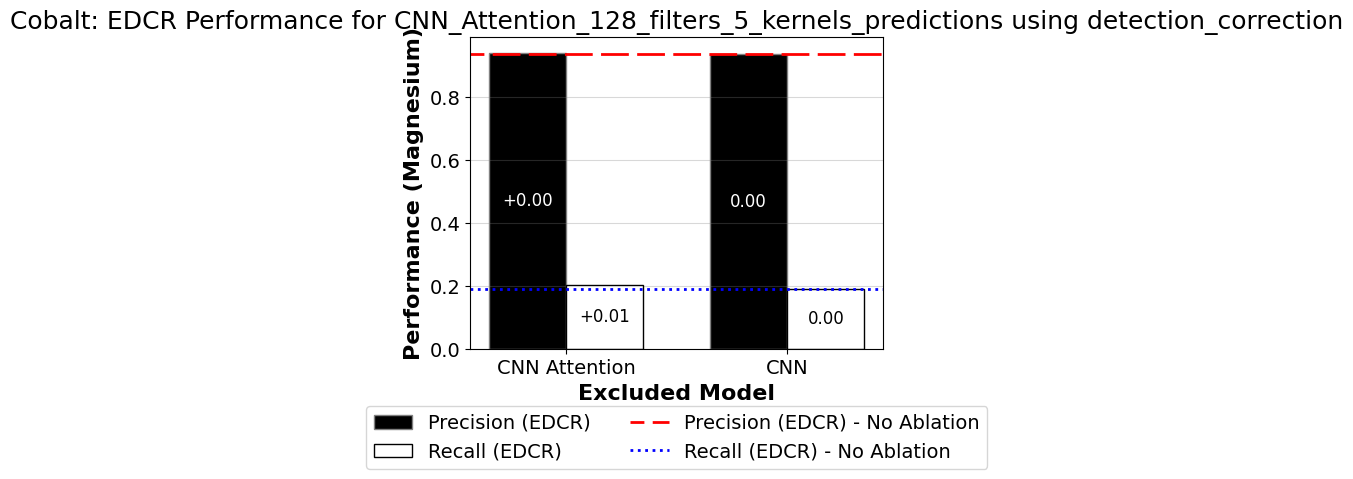

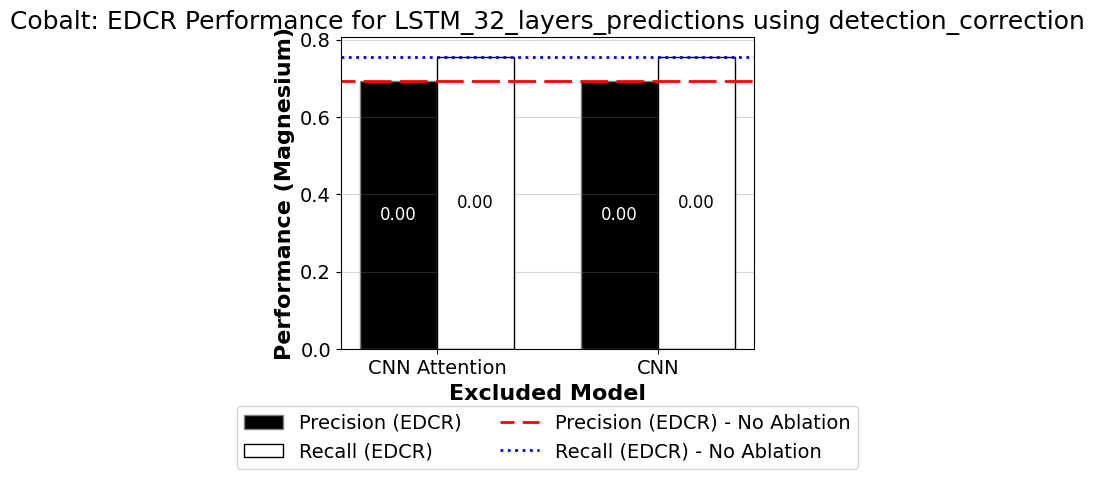

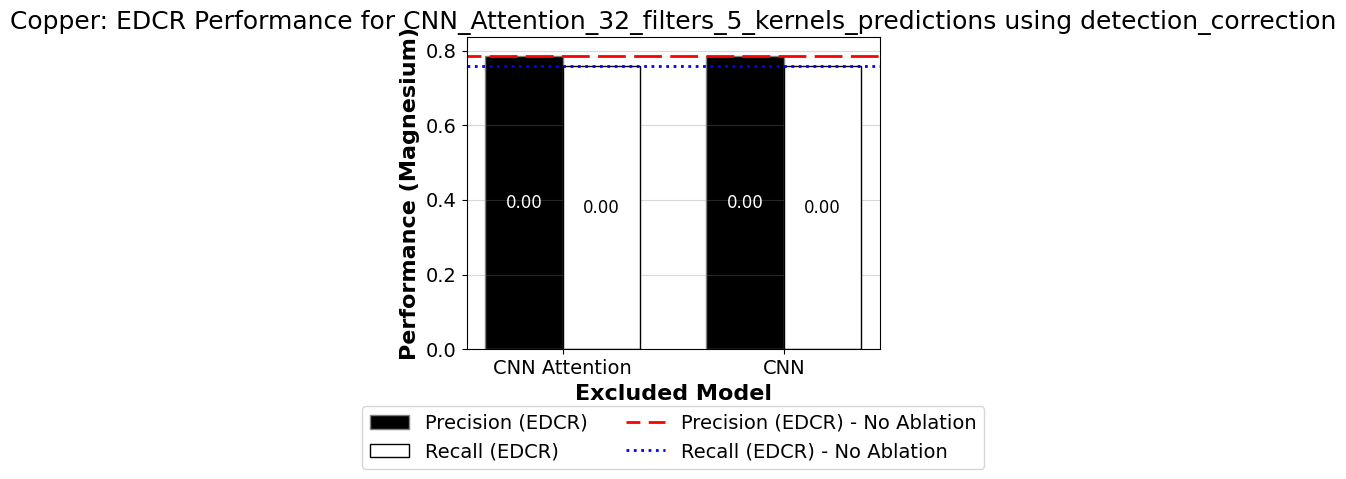

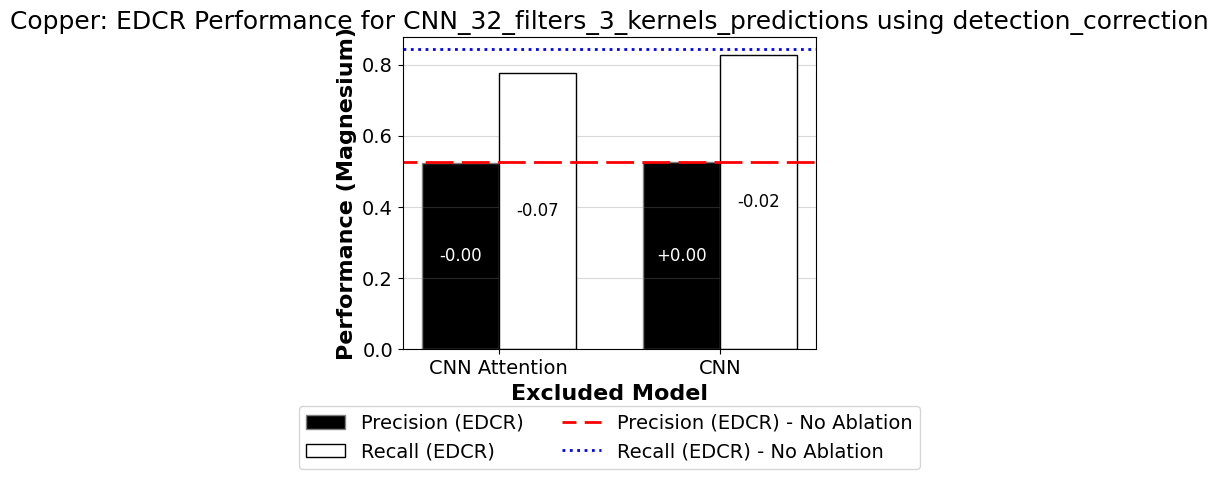

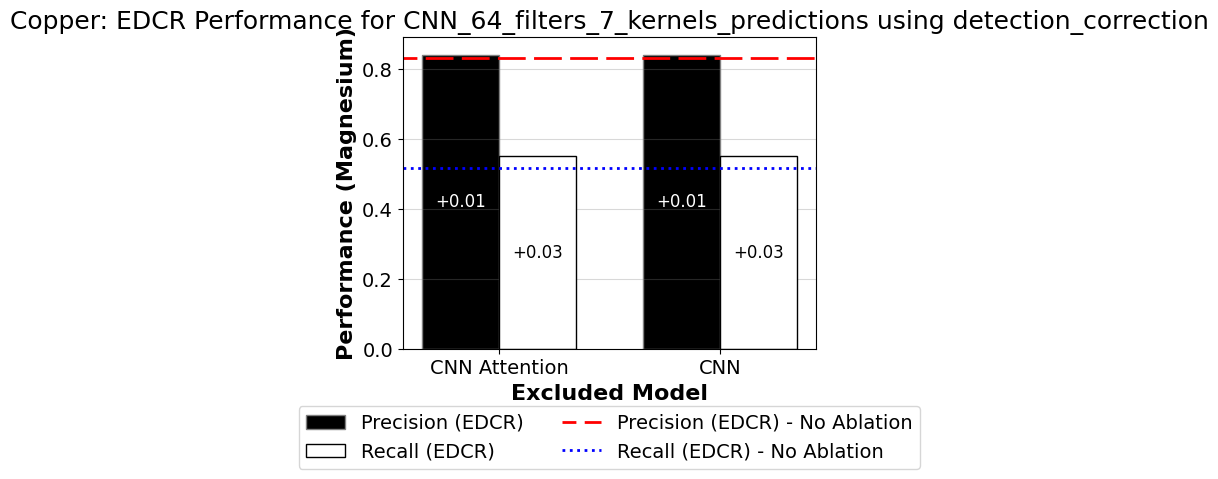

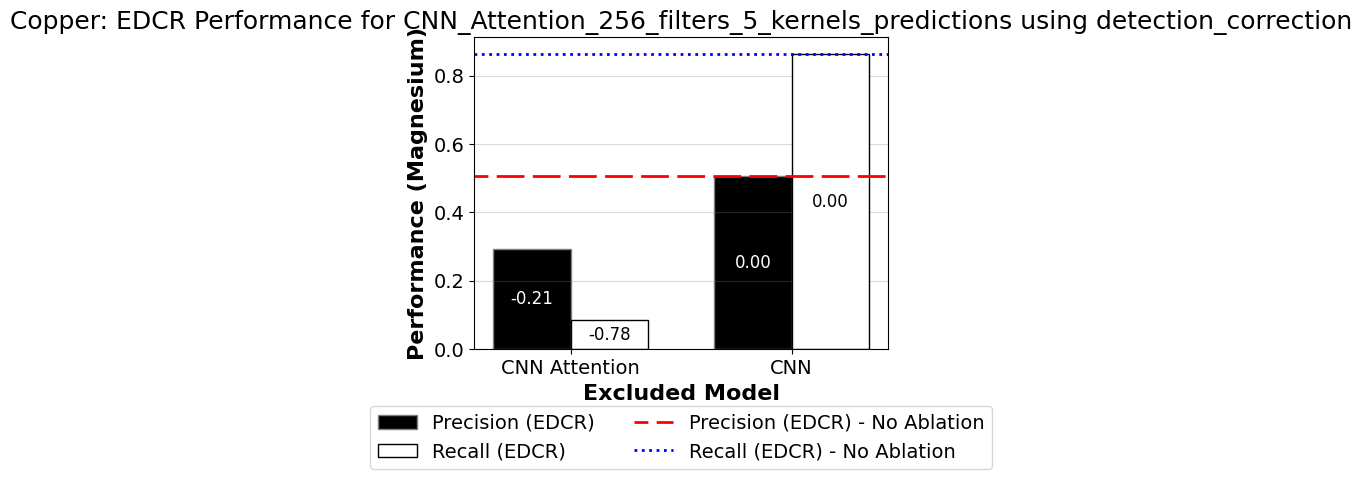

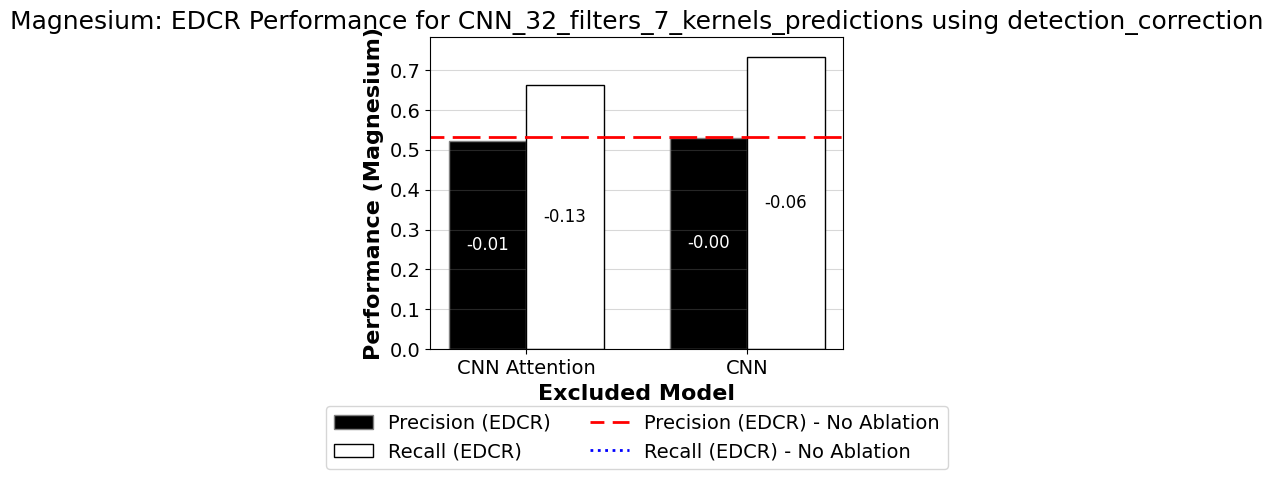

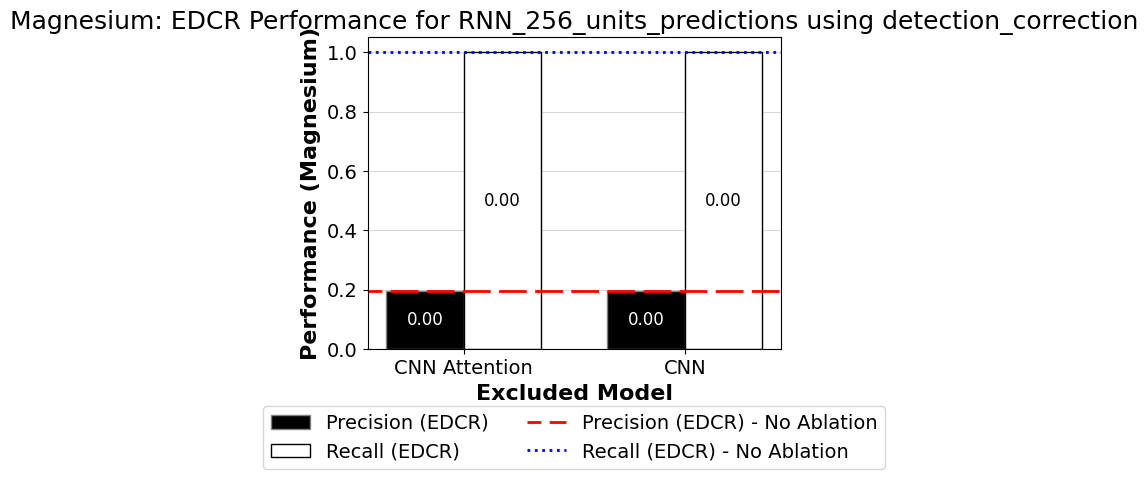

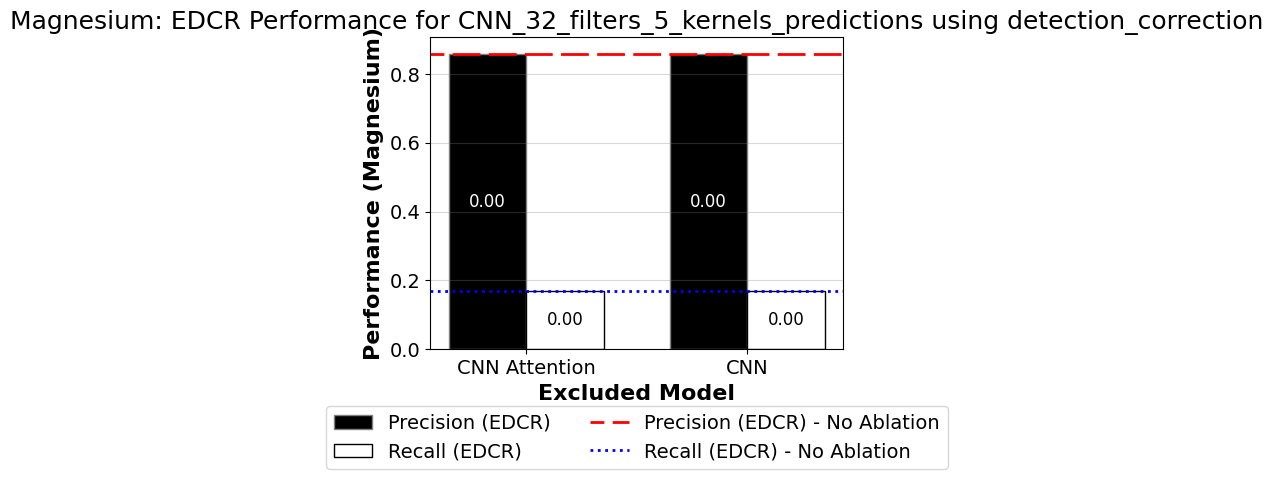

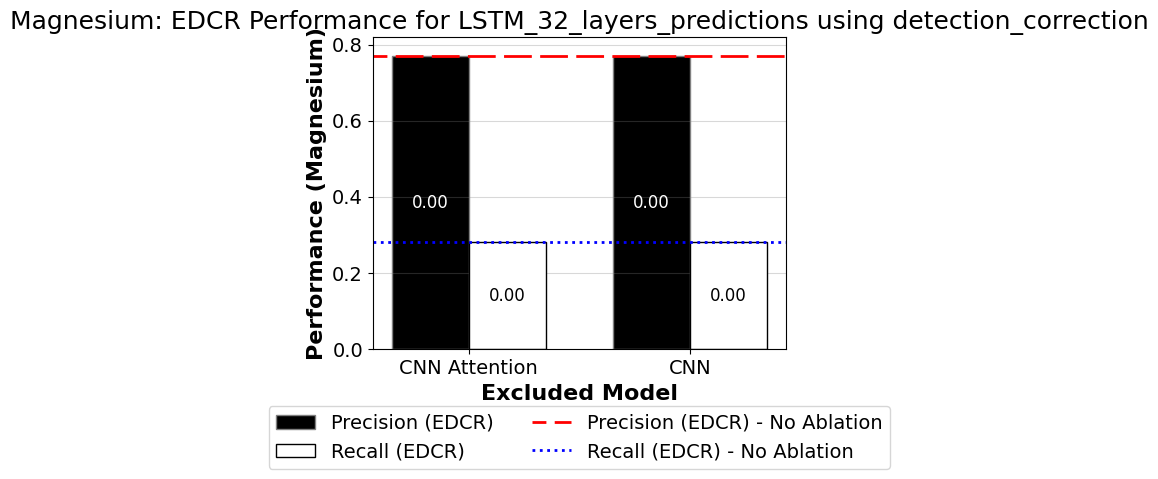

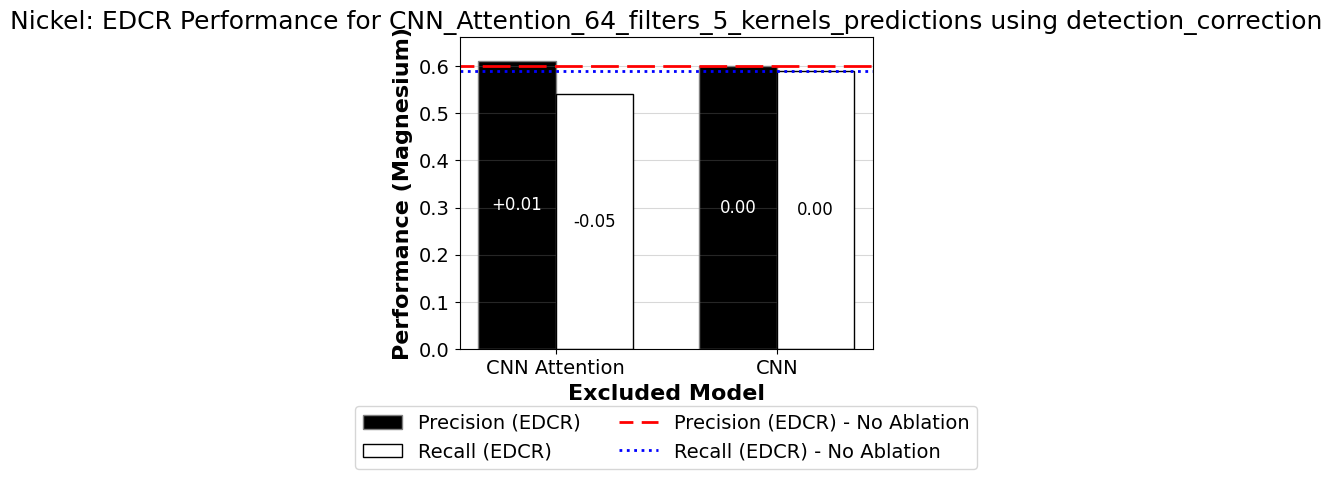

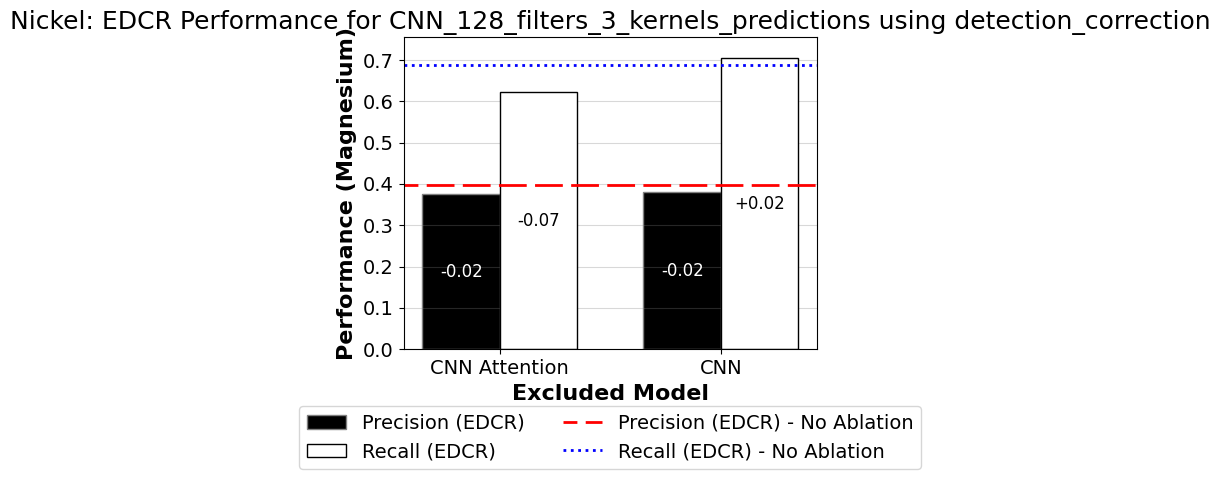

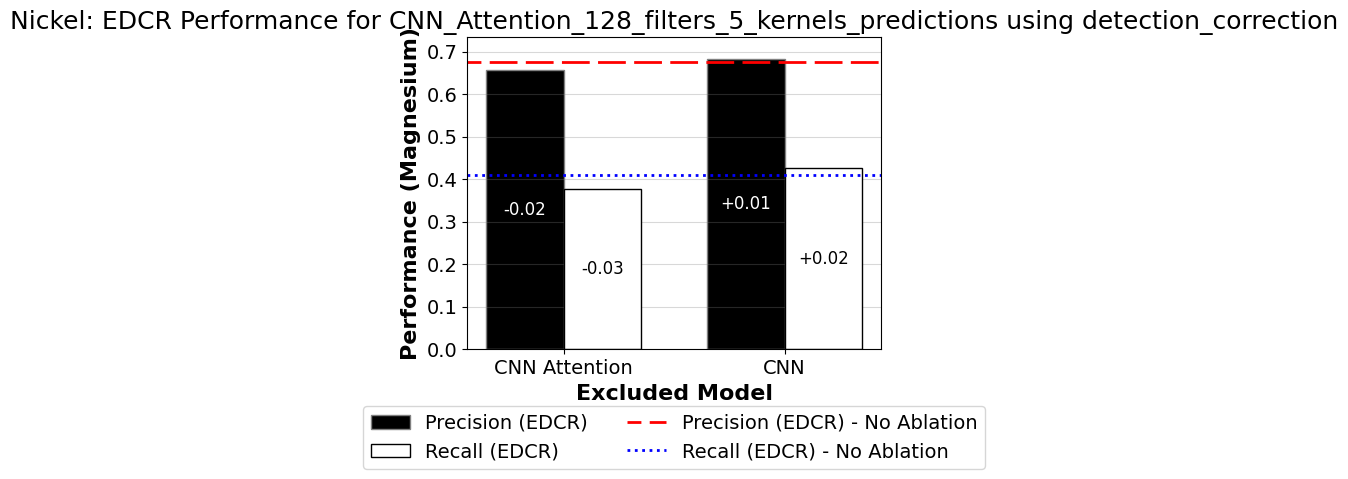

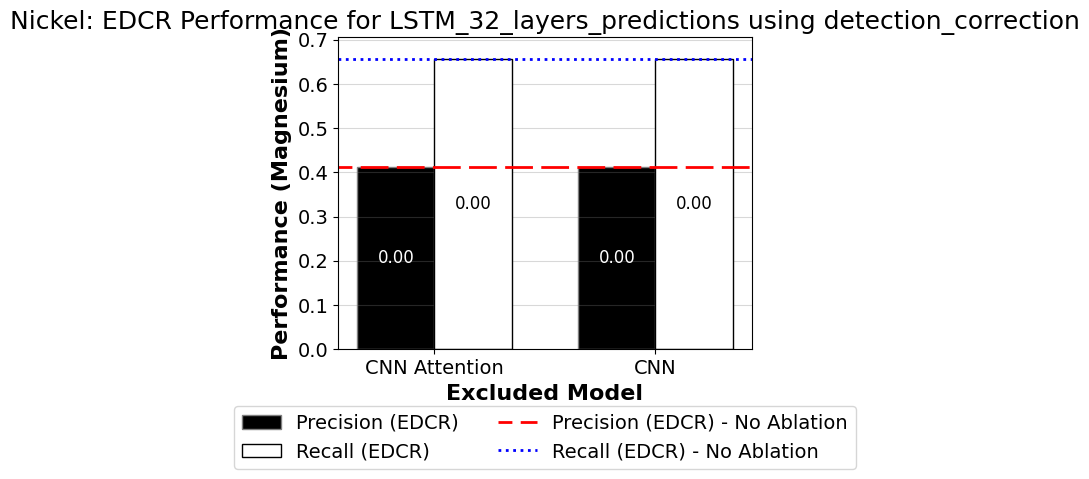

In [33]:
for comm in COMMODITY:
    for algo in ALGO:
        plot_ablation_barcharts(f'out/top_f1_og/{comm}_results.xlsx', algo, comm)
        # plot_ablation_barcharts(f'out/threshold/{comm}_test_results.xlsx', algo, comm)

